<a href="https://colab.research.google.com/github/hosseinimasuod/Classification-using-CNN/blob/main/Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN in TensorFlow
## Project Overview

A Convolutional Neural Network (CNN) has been developed using Keras, inspired by the VGG-16 architecture but designed with fewer layers to match the complexity of the CIFAR-10 dataset. The objective was to construct a robust image classification model capable of distinguishing between 10 categories of 32x32 color images. To enhance the model's generalization, a Dropout layer has been incorporated to mitigate the effects of overfitting.


In [11]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [12]:
SEED_VALUE = 37

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Dataset Summary

The CIFAR-10 dataset is composed of 60,000 color images categorized into 10 distinct classes, with each class containing 6,000 images.
The dataset has been divided into:
- 50,000 training samples
- 10,000 test samples

The 10 image classes in CIFAR-10 are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In below, some sample images from the Dataset has been shown.

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


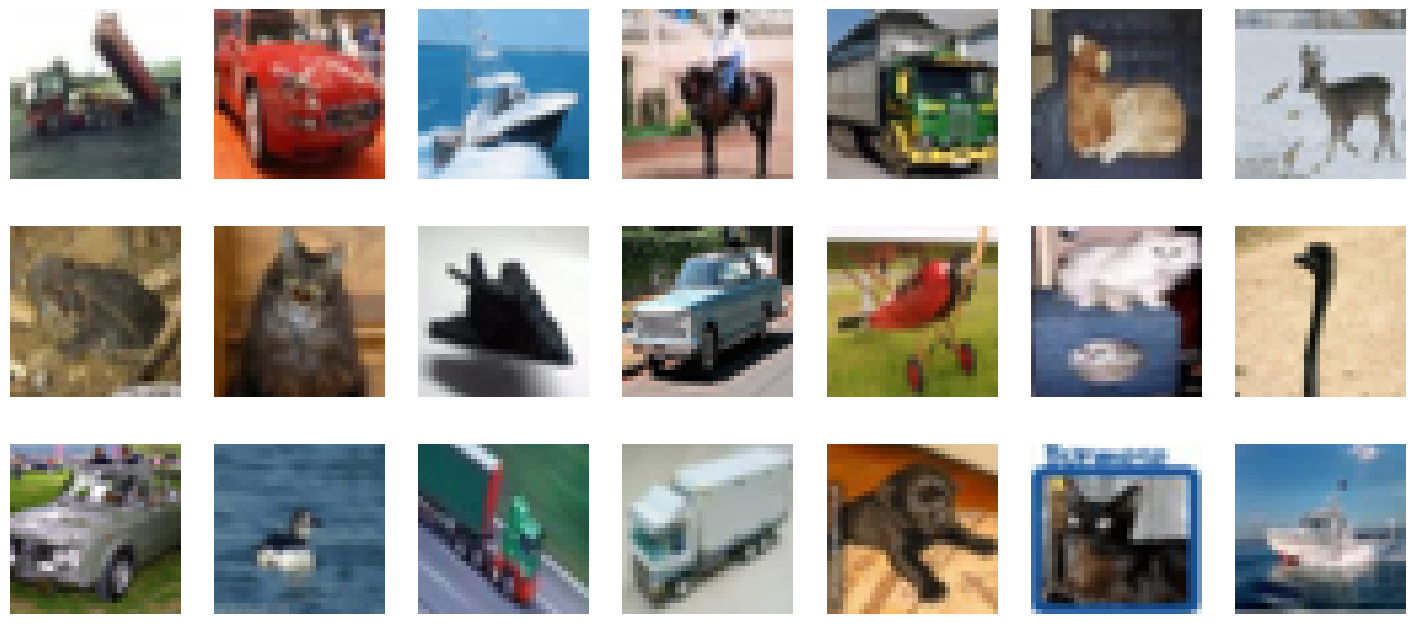

In [14]:
plt.figure(figsize=(18, 8))
num_rows = 3
num_cols = 7

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[3*i + 2, :, :])
    plt.axis("off")

## Dataset Preprocessing
- The image data has been normalized to the range [0,1] to improve training efficiency.

- Class labels (integers) have been converted into one-hot encoded vectors to support categorical classification.

In [15]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Dataset and Training Configuration Parameters
- The dataclasses module in Python has been used to define configuration classes.

- Two separate configuration structures have been created: DatasetConfig and TrainingConfig.

- These classes store dataset-related and training-related parameters in a structured format.


In [20]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

## CNN Implementation
### Model Structure
<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*NNifzsJ7tD2kAfBXt3AzEg.png' width=950 align='center'>

In [ ]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    # Conv Block 1: 32 Filters, MaxPool.
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 2: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 3: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the convolutional features.
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

## Create Model
- An instance of the CNN model has been created by calling the defined function.

- The `.summary()` method has been used to display the architecture of the model in the console.

In [ ]:
# Create the model.
model = cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and Build the model

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.1773 - loss: 2.2121 - val_accuracy: 0.3798 - val_loss: 1.7711
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.3471 - loss: 1.7948 - val_accuracy: 0.4531 - val_loss: 1.5069
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.4458 - loss: 1.5281 - val_accuracy: 0.5059 - val_loss: 1.3571
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5151 - loss: 1.3455 - val_accuracy: 0.5617 - val_loss: 1.2197
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.5848 - loss: 1.1622 - val_accuracy: 0.5286 - val_loss: 1.3938
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6227 - loss: 1.0645 - val_accuracy: 0.6321 - val_loss: 1.0572
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.6684 - loss: 0.9322 - val_accuracy: 0.6316 - val_loss: 1.0835
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.7067 - loss: 0.8328 - val_accu

## Plot the results


In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [21]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

NameError: name 'history' is not defined

## Result
- Results from the baseline model indicate signs of overfitting.

- Validation loss starts increasing after around 10 epochs, while training loss continues to decrease.

- This suggests the model fits the training data well but does not generalize effectively to unseen test data.

- The accuracy plot mirrors this behavior—validation accuracy plateaus while training accuracy continues rising toward 100%.

- Overfitting is common in neural networks and may stem from:

 - The model memorizing specific patterns in the training data.

 - A relatively small training dataset, making it easier for the model to overfit.

## Regularization with Dropout

- **Problem**:
  - Models may overfit the training data, performing poorly on unseen data.

- **Solution**:
  - Apply **regularization techniques** to restrict the model’s flexibility and improve generalization.

- **Dropout**:
  - A built-in regularization method in Keras.
  - Implemented as a **Dropout layer** that randomly drops a percentage of neurons during training.
  - Prevents the network from becoming too reliant on any specific neuron.

- **Where to Use Dropout**:
  - In **convolutional layers**: typically used **after the max pooling layer** to drop neurons from the feature maps.
  - In **fully connected layers**: applied **after the dense layer** to drop neurons in the fully connected layer.

- **Dropout Layer Argument**:
  - Accepts a **fraction** (e.g., `0.3`) indicating the percentage of neurons to randomly drop during training.

- **Typical CNN Usage**:
  - Add a `Dropout` layer at the end of each **convolutional block**.
  - Add a `Dropout` layer **after the dense layer** in the classifier.


In [16]:
def cnn_model_dropout(input_shape=(32, 32, 3)):

    model = Sequential()

    # Conv Block 1: 32 Filters, MaxPool.
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten the convolutional features.
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [17]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and build the model with dropout

In [18]:
model_dropout.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [22]:
history = model_dropout.fit(X_train,
                            y_train,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            epochs=TrainingConfig.EPOCHS,
                            verbose=1,
                            validation_split=.3,
                           )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.1525 - loss: 2.2478 - val_accuracy: 0.3186 - val_loss: 1.9025
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.3180 - loss: 1.8685 - val_accuracy: 0.4115 - val_loss: 1.6055
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.3940 - loss: 1.6502 - val_accuracy: 0.3611 - val_loss: 1.7384
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.4506 - loss: 1.5114 - val_accuracy: 0.4976 - val_loss: 1.3773
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.4927 - loss: 1.3893 - val_accuracy: 0.5333 - val_loss: 1.3162
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.5262 - loss: 1.2953 - val_accuracy: 0.5600 - val_loss: 1.2353
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.5698 - loss: 1.1995 - val_accuracy: 0.6093 - val_loss: 1.1190
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.5962 - loss: 1.1234 - val_accu

## Plot the Dropout results

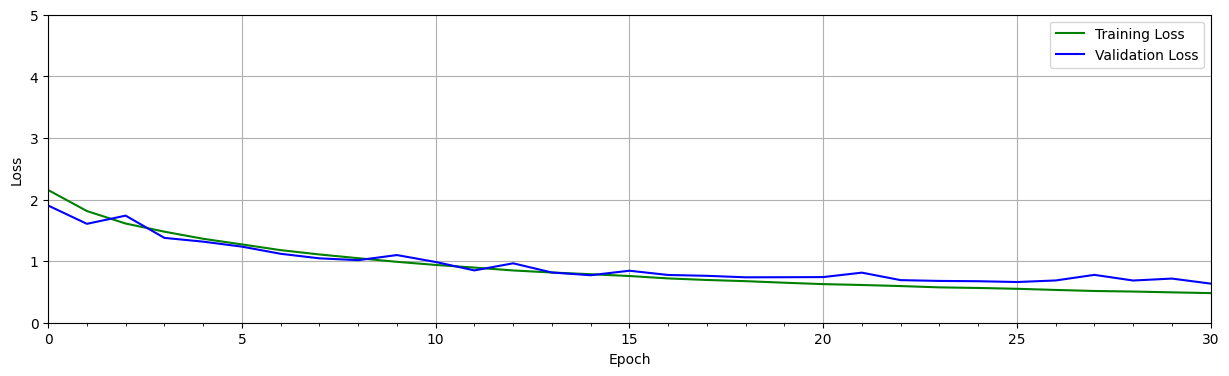

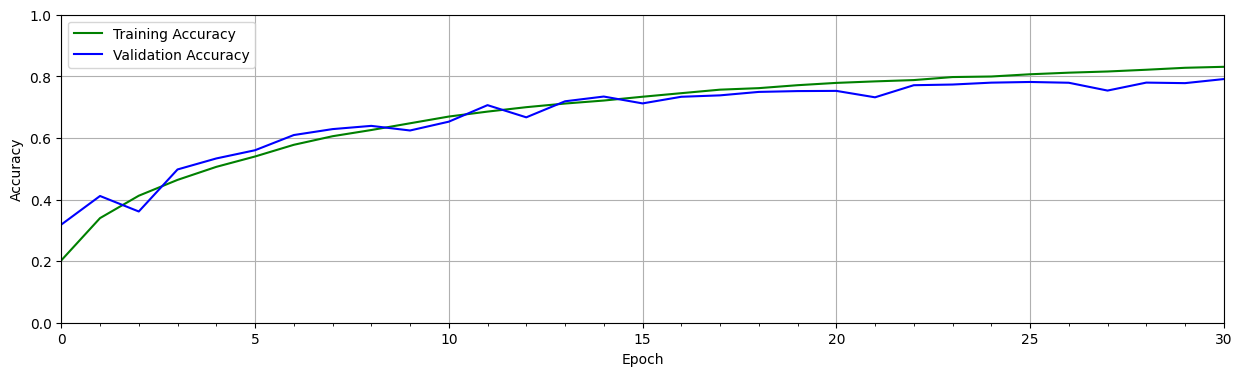

In [23]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

## Performance with Dropout

- **Observation**:
  - The **training curves** align closely with the **validation curves**, indicating improved generalization.
  - The model with **Dropout** achieves **higher validation accuracy** compared to the baseline model without Dropout.

- **Conclusion**:
  - Dropout effectively reduces overfitting.
  - Regularization through dropout helps the model perform better on unseen data.

- **Comparison**:
  - Below are the training and validation accuracy/loss curves for models **with** and **without** Dropout for comparison.


## Model Evaluation

In [27]:
test_loss, test_acc = model_dropout.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7832 - loss: 0.6555
Test accuracy: 77.910


## Evaluate Model with visualization

In [29]:
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 4
    num_cols = 6

    # Retrieve a number of images from the dataset.
    data_batch = dataset[0 : num_rows * num_cols]

    # Get predictions from model.
    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction accuracy:  0.91


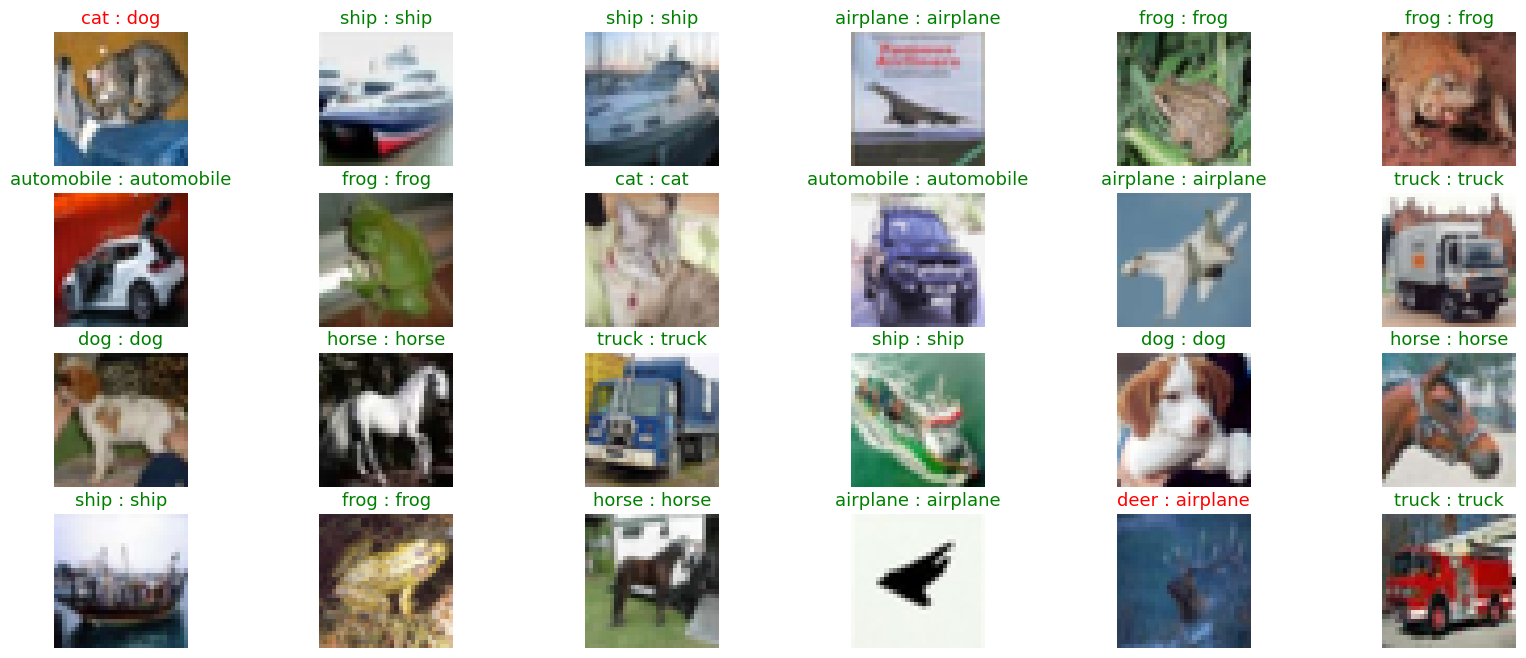

In [31]:
evaluate_model(X_test, model_dropout)

### Confusion Matrix

In [30]:
# Generate predictions for the test dataset.
predictions = model_dropout.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step


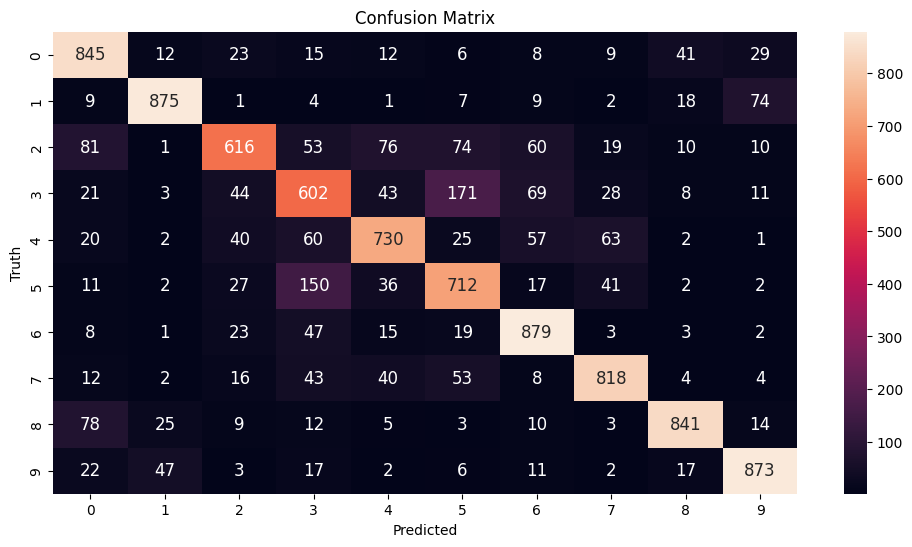

In [32]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[12, 6])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Confusion Matrix Analysis

### Key Observations:

- **Dogs (Label: 5)** and **Cats (Label: 3)** are frequently **misclassified as each other**:
  - **Cats misclassified as Dogs**: 171 times.
  - **Dogs misclassified as Cats**: 150 times.
  - This is likely due to the **visual similarity** between cats and dogs in some images.

- **Trucks (Label: 9)** are often **confused with Automobiles (Label: 1)**:
  - This confusion is also intuitive due to **structural and visual similarities** between these vehicle types.

### Conclusion:

- The confusion matrix helps highlight class-level weaknesses.
- Intuitive misclassifications often align with **semantic similarities** in the dataset.
